# Visualisation

In [16]:
# Setup code for the notebook
%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Tools to handle S03
from tools import s03_handler
from tools import data_handler

# Display tools
from ipytools import display_RSO
from ipytools import readGTIFF
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
lst_tif, area, triplets = s03_handler()

In [20]:
triplets.keys()

dict_keys(['1Z', '8Z', '7Z'])

In [41]:
satellites = list(L.keys())
satellites.sort()
satellites

['1Z', '7Z', '8Z']

In [78]:
L = {key : list(triplets[key]['d1'].values()) for key in triplets.keys()}
for key in L.keys():
    L[key].sort()
L

{'1Z': ['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0006.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0007.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0008.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0009.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0010.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0011.tif',
  '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_

<IPython.core.display.Javascript object>


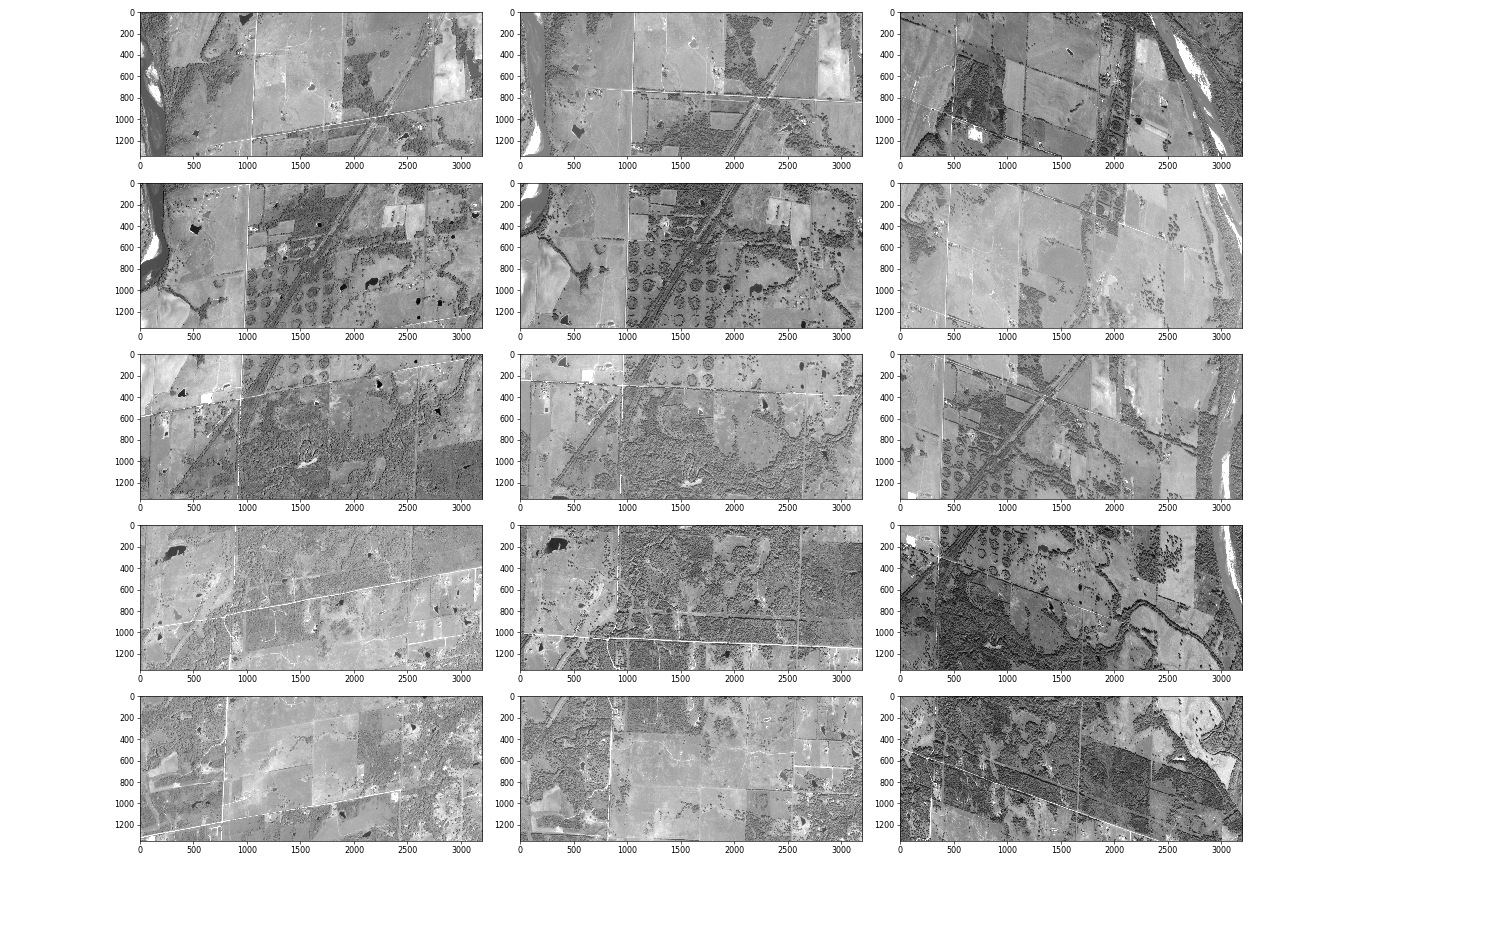

In [56]:
l = 5
satellites = ['1Z', '8Z', '7Z']
nbr_satellite = len(satellites)
f, ax = plt.subplots(l, nbr_satellite, figsize = (8 * nbr_satellite, l * 3))

for j in range(len(satellites)):
    lst = L[satellites[j]]
    for i in range(l):
        if len(satellites) > 1:
            ax[i][j].imshow(display_RSO(readGTIFF(lst[i]), plot = False).squeeze(), cmap = "gray")
        else:
            ax[i].imshow(display_RSO(readGTIFF(lst[i]), plot = False).squeeze(), cmap = "gray")
f.tight_layout()

<IPython.core.display.Javascript object>


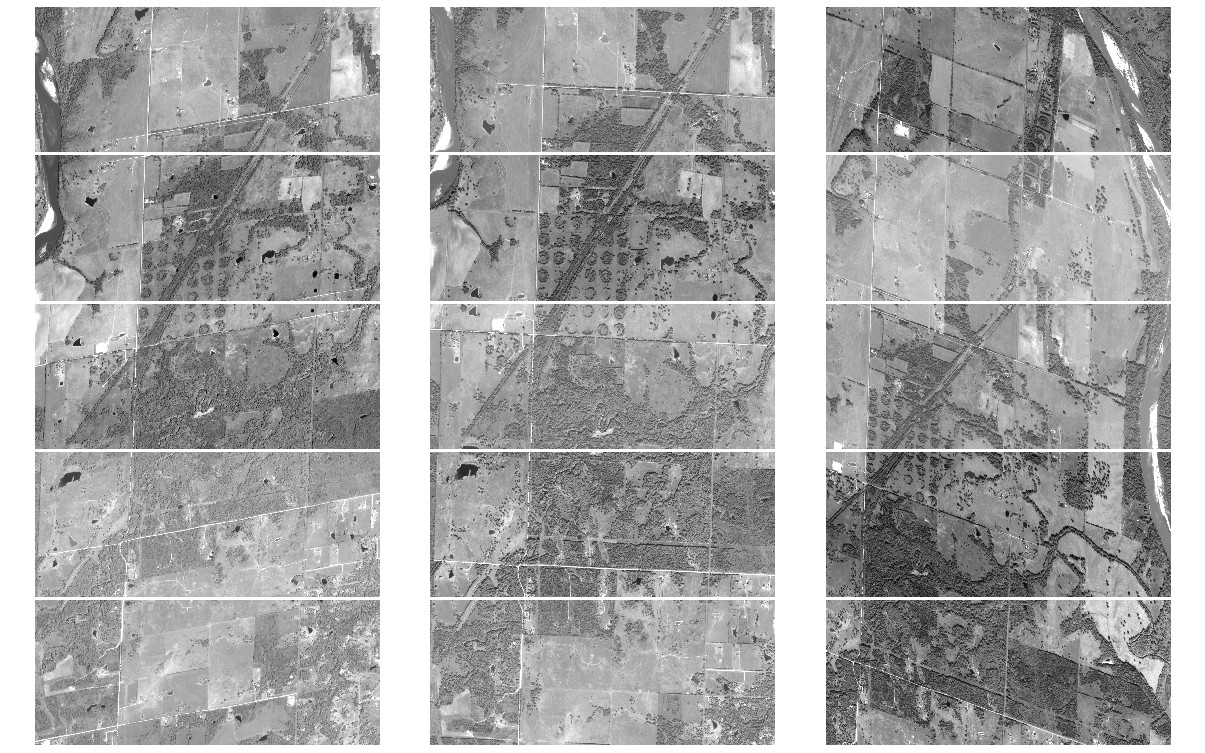

In [106]:
l = 5
# satellites = ['1Z']
satellites = ['1Z', '8Z', '7Z']
nbr_satellite = len(satellites)
plt.figure(figsize = (8 * nbr_satellite, 3 * l))
gs = gridspec.GridSpec(l, nbr_satellite, width_ratios=[3]*nbr_satellite, height_ratios=[1]*l)
gs.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

for j in range(len(satellites)):
    lst = L[satellites[j]]
    for i in range(l):
        ax = plt.subplot(gs[i, j])
        plt.axis('off')
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
        ax.set_aspect('equal')
        ax.imshow(display_RSO(readGTIFF(lst[i]), plot = False).squeeze(), cmap = "gray")
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)            
f.tight_layout()
f.savefig('pointing_error_correction/images/d1.png', bbox_inches='tight', pad_inches=0)
plt.show()